In [150]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, LSTM, GRU, Bidirectional, TimeDistributed, InputLayer, Embedding, Conv1D, Input, concatenate, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
from tensorflow.keras import Model

In [2]:
from numpy.random import seed
seed(0)
from tensorflow.random import set_seed
set_seed(0)


**POS tagging**

А теперь модифицируем нашу сеть для задачи тэгирования последовательности(many-to-many). На вход сеть будет брать предложение длины n, а на выход отдавать n частеречных тэгов, соответсвующих словам в предложении.   

In [22]:
import nltk
nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [23]:
tagged_sentences = nltk.corpus.treebank.tagged_sents()

In [24]:
tagged_sentences[0]

[('Pierre', 'NNP'),
 ('Vinken', 'NNP'),
 (',', ','),
 ('61', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 (',', ','),
 ('will', 'MD'),
 ('join', 'VB'),
 ('the', 'DT'),
 ('board', 'NN'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('nonexecutive', 'JJ'),
 ('director', 'NN'),
 ('Nov.', 'NNP'),
 ('29', 'CD'),
 ('.', '.')]

In [25]:
sentences, sentence_tags =[], [] 
for tagged_sentence in tagged_sentences:
    sentence, tags = zip(*tagged_sentence)
    sentences.append(sentence)
    sentence_tags.append(tags)

In [26]:
sentences[0]

('Pierre',
 'Vinken',
 ',',
 '61',
 'years',
 'old',
 ',',
 'will',
 'join',
 'the',
 'board',
 'as',
 'a',
 'nonexecutive',
 'director',
 'Nov.',
 '29',
 '.')

In [27]:
len(sentence_tags)

3914

In [28]:
sent_train, sent_test, tag_train, tag_test = train_test_split(sentences, sentence_tags, test_size=0.2, random_state=0)

In [29]:
vocab = Counter()
for sent in sent_train:
    sent = [word.lower() for word in sent]
    vocab.update(sent)

In [30]:
filtered_vocab = {word for word in vocab if vocab[word] > 5}

In [31]:
len(filtered_vocab)

1679

In [32]:
word2id = {'PAD':0,'UNK':1}    
for i,word in enumerate(filtered_vocab):
      word2id[word] = i + 2

id2word = {i:word for word, i in word2id.items()}

In [33]:
len(id2word)

1681

In [34]:
tag2id = {'PAD':0}  
for tags in tag_train:
    for tag in tags:
      if tag.lower() not in tag2id:
        tag2id[tag.lower()] = len(tag2id)

id2tag = {i:tag for tag, i in tag2id.items()}

In [35]:
len(id2tag)

47

In [36]:
def data2ints(data, smth2id):
  int_data = []
  for seq in data:
      int_seq = []
      for i in seq:
          try:
            int_seq.append(smth2id[i.lower()])
          except KeyError:
            int_seq.append(smth2id['UNK'])
  
      int_data.append(int_seq)
  return int_data
 

In [37]:
X_train_ids, X_test_ids = data2ints(sent_train, word2id), data2ints(sent_test, word2id)
y_train_ids, y_test_ids = data2ints(tag_train, tag2id), data2ints(tag_test, tag2id)


print(X_train_ids[0])
print(X_test_ids[0])
print(y_train_ids[0])
print(y_test_ids[0])

[1427, 1, 1, 1, 1069, 1, 1611, 29, 928]
[392, 1035, 1188, 1325, 116, 615, 838, 1, 598, 1, 577, 629, 278, 928]
[1, 1, 1, 2, 1, 1, 3, 4, 5]
[18, 19, 21, 24, 10, 25, 24, 18, 21, 14, 3, 7, 15, 5]


In [126]:
MAX_LEN = max(len(x) for x in X_train)

In [63]:
X_train, X_test = pad_sequences(X_train_ids, maxlen=MAX_LEN, padding='post'), pad_sequences(X_test_ids, maxlen=MAX_LEN, padding='post')
y_train_pad, y_test_pad = pad_sequences(y_train_ids, maxlen=MAX_LEN, padding='post'), pad_sequences(y_test_ids, maxlen=MAX_LEN, padding='post')

In [135]:
print(X_train.shape, y_train_pad.shape, X_test.shape, y_test_pad.shape)

(3131, 32) (3131, 32) (783, 32) (783, 32)


In [65]:
y_train, y_test = to_categorical(y_train_pad, num_classes=len(tag2id)), to_categorical(y_test_pad, num_classes=len(tag2id))

In [66]:
y_test[6]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [67]:
np.argmax(y_test[6], axis=1)

array([21,  7, 16,  2, 15,  3,  7,  4,  5,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

# HW

In [105]:
m = 0
for sent in char_sent_train:
  for word in sent:
    if len(word) > m:
      m = len(word)
      print(word, m)

['E', 'd', 'w', 'a', 'r', 'd'] 6
['s', 'u', 'c', 'c', 'e', 'e', 'd', 'e', 'd'] 9
['c', 'h', 'a', 'r', 'a', 'c', 't', 'e', 'r', 's'] 10
['i', 'n', 't', 'e', 'r', 't', 'i', 't', 'l', 'e', 's'] 11
['m', 'u', 'l', 't', 'i', '-', 'c', 'r', 'y', 's', 't', 'a', 'l'] 13
['s', 't', 'o', 'c', 'k', '-', 's', 'p', 'e', 'c', 'i', 'a', 'l', 'i', 's', 't'] 16
['C', 'o', 'r', 't', 'o', 'n', '-', 'C', 'h', 'a', 'r', 'l', 'e', 'm', 'a', 'g', 'n', 'e'] 18
['t', 'e', 'l', 'e', 'p', 'h', 'o', 'n', 'e', '-', 'i', 'n', 'f', 'o', 'r', 'm', 'a', 't', 'i', 'o', 'n'] 21
['M', 'a', 'c', 'm', 'i', 'l', 'l', 'a', 'n', '\\', '/', 'M', 'c', 'G', 'r', 'a', 'w', '-', 'H', 'i', 'l', 'l'] 22
['m', 'a', 'r', 'k', 'e', 't', 'i', 'n', 'g', '-', 'c', 'o', 'm', 'm', 'u', 'n', 'i', 'c', 'a', 't', 'i', 'o', 'n', 's'] 24


's'

In [ ]:
char_sent_train, char_sent_test = [], []
for s in sent_train:
  char_s = [list(word) for word in s]
  char_sent_train.append(char_s)
for s in sent_test:
  char_s = [list(word) for word in s]
  char_sentences.append(char_s)  

In [83]:
char_vocab = Counter()
for s in char_sent_train:
    for word in s:
      char_vocab.update(word)

In [84]:
len(char_vocab)

78

In [ ]:
char_filtered_vocab = {word for word in char_vocab if char_vocab[word] > 5}
len(char_filtered_vocab)

77

In [111]:
char2id = {'PAD':0,'UNK':1}    
for i,char in enumerate(char_filtered_vocab):
      char2id[char] = i + 2

id2char = {i:char for char, i in char2id.items()}

def data2ints_char(data, smth2id):
  int_data = []
  for s in data:
      int_s = []
      for word in s:
          int_w = []
          for i in word:
            try:
              int_w.append(smth2id[i])
            except KeyError:
              int_w.append(smth2id['UNK'])
          int_s.append(int_w)
  
      int_data.append(int_s)
  return int_data

In [112]:
char_X_train_ids, char_X_test_ids = data2ints_char(char_sent_train, char2id), data2ints_char(char_sent_test, char2id)

In [121]:
CHAR_MAX_LEN = 0
for s in char_X_train_ids:
  for w in s:
    if len(w) > CHAR_MAX_LEN:
      CHAR_MAX_LEN = len(w)
CHAR_MAX_LEN

24

In [139]:
char_X_train_ids_padded = []
for c in char_X_train_ids:
  char_X_train_ids_padded.append(pad_sequences(c, maxlen=CHAR_MAX_LEN, padding='post'))
char_X_train = pad_sequences(char_X_train_ids_padded, maxlen=MAX_LEN, padding='post')

char_X_test_ids_padded = []
for c in char_X_test_ids:
  char_X_test_ids_padded.append(pad_sequences(c, maxlen=CHAR_MAX_LEN, padding='post'))
char_X_test = pad_sequences(char_X_test_ids_padded, maxlen=MAX_LEN, padding='post')

In [140]:
print(char_X_train.shape, char_X_test.shape)

(3131, 32, 24) (783, 32, 24)


In [184]:
word_in = Input(shape=(MAX_LEN), name="word_input")
word_embeddings = Embedding(len(word2id),100, name="word_emb", mask_zero=True)(word_in)
word_bilstm = Bidirectional(LSTM(16, return_sequences=True), merge_mode='concat', name="word_bi")(word_embeddings)
word_drop = Dropout(0.2, name="drop")(word_bilstm)

char_in = Input(shape=(MAX_LEN, CHAR_MAX_LEN), name="char_input")
char_embeddings = Embedding(len(char2id),100, input_length=CHAR_MAX_LEN, name="char_emb")(char_in)
char_conv = TimeDistributed(Conv1D(kernel_size=20, filters=24, kernel_regularizer='l2', padding='same'), name="conv")(char_embeddings)
char_flat = TimeDistributed(Flatten(), name ="flat")(char_conv)

x = concatenate([word_drop, char_flat], name="concat")

bilstm = Bidirectional(LSTM(16, return_sequences=True), merge_mode='concat', name="bi")(x)
dense = TimeDistributed(Dense(len(tag2id)), name="dense")(bilstm)
outs = Activation('softmax', name="activation")(dense)
hw_model = Model(inputs=[word_in, char_in], outputs=outs, name="hw_model")

hw_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
hw_model.summary()

Model: "hw_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
word_input (InputLayer)         [(None, 32)]         0                                            
__________________________________________________________________________________________________
char_input (InputLayer)         [(None, 32, 24)]     0                                            
__________________________________________________________________________________________________
word_emb (Embedding)            (None, 32, 100)      168100      word_input[0][0]                 
__________________________________________________________________________________________________
char_emb (Embedding)            (None, 32, 24, 100)  7900        char_input[0][0]                 
___________________________________________________________________________________________

In [183]:
import tensorflow as tf
# ModelCheckpoint сохраняет лучшие версии моделей
checkpoint = tf.keras.callbacks.ModelCheckpoint('model.weights', # названия файла 
                                                monitor='val_accuracy', # за какой метрикой следить
                                                verbose=1, # будет печатать что происходит
                                                save_weights_only=True, # если нужно только веса сохранить
                                                save_best_only=True, # сохранять только лучшие
                                                mode='max', # если метрика должна расти, то тут max и min если наоборот
                                                save_freq='epoch' # как часто вызывать
                                               )
                                               

# EarlyStopping позволяет автоматически остановить обучение, если качество не улучшается 
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                              min_delta=0.01, # какая разница считается как улучшение
                                              patience=5, # сколько эпох терпеть отсутствие улучшений
                                              verbose=1, 
                                              mode='max',
                                              )

In [185]:
hw_model.fit([X_train, char_X_train],y_train, validation_data=([X_test, char_X_test], y_test), batch_size=128, epochs=40, callbacks=[checkpoint, early_stop])

Epoch 1/40
24/25 [===========================>..] - ETA: 0s - loss: 2.5322 - accuracy: 0.0957
Epoch 00001: val_accuracy improved from -inf to 0.10345, saving model to model.weights
25/25 [==============================] - 6s 250ms/step - loss: 2.5267 - accuracy: 0.0958 - val_loss: 2.2912 - val_accuracy: 0.1034
Epoch 2/40
24/25 [===========================>..] - ETA: 0s - loss: 2.1226 - accuracy: 0.1454
Epoch 00002: val_accuracy improved from 0.10345 to 0.20318, saving model to model.weights
25/25 [==============================] - 2s 61ms/step - loss: 2.1214 - accuracy: 0.1471 - val_loss: 2.0526 - val_accuracy: 0.2032
Epoch 3/40
24/25 [===========================>..] - ETA: 0s - loss: 1.9484 - accuracy: 0.2117
Epoch 00003: val_accuracy improved from 0.20318 to 0.26094, saving model to model.weights
25/25 [==============================] - 2s 62ms/step - loss: 1.9476 - accuracy: 0.2120 - val_loss: 1.9231 - val_accuracy: 0.2609
Epoch 4/40
24/25 [===========================>..] - ETA: 0s 

In [186]:
def visualize(model):
  plt.plot(model.history.history['accuracy'])
  plt.plot(model.history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

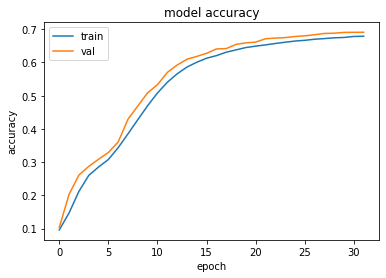

In [188]:
visualize(hw_model)

Сравним с прошлой моделью

In [189]:
mask_model = Sequential()
mask_model.add(InputLayer(input_shape=(MAX_LEN)))
mask_model.add(Embedding(len(word2id),100, mask_zero=True))
mask_model.add(Bidirectional(LSTM(256, return_sequences=True)))
mask_model.add(Dropout(0.2))
mask_model.add(Bidirectional(LSTM(128, return_sequences=True)))
mask_model.add(TimeDistributed(Dense(len(tag2id))))
mask_model.add(Activation('softmax'))
mask_model.compile(loss='categorical_crossentropy', optimizer='Adam', 
                   metrics=['accuracy'])
mask_model.fit(X_train,y_train, validation_data=(X_test, y_test), batch_size=128, epochs=40, callbacks=[checkpoint, early_stop])

Epoch 1/40
24/25 [===========================>..] - ETA: 0s - loss: 2.3362 - accuracy: 0.1101
Epoch 00001: val_accuracy did not improve from 0.69093
25/25 [==============================] - 5s 190ms/step - loss: 2.3316 - accuracy: 0.1104 - val_loss: 2.1694 - val_accuracy: 0.1250
Epoch 2/40
25/25 [==============================] - ETA: 0s - loss: 2.0893 - accuracy: 0.1209
Epoch 00002: val_accuracy did not improve from 0.69093
25/25 [==============================] - 1s 39ms/step - loss: 2.0893 - accuracy: 0.1209 - val_loss: 2.1227 - val_accuracy: 0.1281
Epoch 3/40
25/25 [==============================] - ETA: 0s - loss: 2.0554 - accuracy: 0.1294
Epoch 00003: val_accuracy did not improve from 0.69093
25/25 [==============================] - 1s 37ms/step - loss: 2.0554 - accuracy: 0.1294 - val_loss: 2.0892 - val_accuracy: 0.1420
Epoch 4/40
25/25 [==============================] - ETA: 0s - loss: 1.9773 - accuracy: 0.1862
Epoch 00004: val_accuracy did not improve from 0.69093
25/25 [======

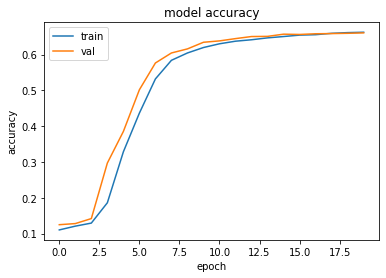

In [190]:
visualize(mask_model)

Выиграли около 3 сотых - 0.6909 у модели с двумя инпутами против 0.6607 модели с одной

In [219]:
def predict(sentence):
  word_id_sent = data2ints([sentence], word2id)
  words = pad_sequences(word_id_sent, maxlen=MAX_LEN, padding='post')

  char_id_sent = data2ints_char([sentence], char2id)
  char_id_sent_padded = []
  for c in char_id_sent:
      char_id_sent_padded.append(pad_sequences(c, maxlen=CHAR_MAX_LEN, padding='post'))
  chars = pad_sequences(char_id_sent_padded, maxlen=MAX_LEN, padding='post')
  prediction = hw_model.predict([words, chars])

In [229]:
prediction = predict(hw_model, sent_test[0])

('You', 'do', "n't", 'want', '*-1', 'to', 'get', 'yourself', 'too', 'upset', 'about', 'these', 'things', '.')
('PRP', 'VBP', 'RB', 'VB', '-NONE-', 'TO', 'VB', 'PRP', 'RB', 'JJ', 'IN', 'DT', 'NNS', '.')


In [231]:
for sent in prediction:
  words = sent_test[0]
  tags = tag_test[0]
  for i in range(len(words)):
    p = np.argmax(sent[i], axis=-1)
    print(words[i], tags[i], id2tag[p])

You PRP prp
do VBP vbp
n't RB rb
want VB vb
*-1 -NONE- -none-
to TO to
get VB vb
yourself PRP jj
too RB rb
upset JJ rb
about IN in
these DT dt
things NNS nns
. . .


In [249]:
from numpy import random
def check_prediction_on_existing():
    index = random.randint(len(sentences))
    word_id_sent = data2ints([sentence], word2id)
    words = pad_sequences(word_id_sent, maxlen=MAX_LEN, padding='post')

    char_id_sent = data2ints_char([sentence], char2id)
    char_id_sent_padded = []
    for c in char_id_sent:
        char_id_sent_padded.append(pad_sequences(c, maxlen=CHAR_MAX_LEN, padding='post'))
    chars = pad_sequences(char_id_sent_padded, maxlen=MAX_LEN, padding='post')
    prediction = hw_model.predict([words, chars])
    for sent in prediction:
      words = sentences[index]
      tags = sentence_tags[index]
      for i in range(len(words)):
        p = np.argmax(sent[i], axis=-1)
        print(words[i], tags[i], id2tag[p])

In [250]:
check_prediction_on_existing()

`` `` nnp
I PRP vbd
was VBD -none-
trying VBG prp
*-1 -NONE- vbz
to TO -none-
help VB to
kids NNS vb
in IN nn
an DT in
unfair JJ dt
testing NN jj
situation NN nn
, , in
'' '' jj
she PRP nn
says VBZ .
*T*-2 -NONE- rb
. . rb
